In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
# from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [2]:
k = 2

In [3]:
m2 = 1.38
m3 = 4.49 
m4 = 2.27
m5 = 2.53
m6 = 1.10
m7 = 2.74
m8 = 3.67

q2 = 60.86
q3 = 66.08
q4 = 59.85
q5 = 40.46
q6 = 37.21
q7 = 56.43
q8 = 40.85

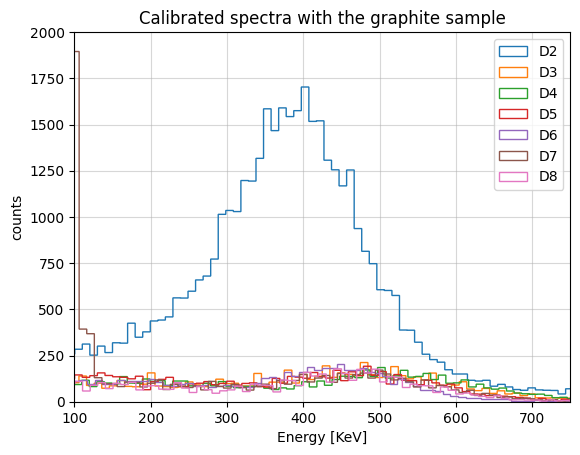

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 353077.21879112284 ± 5559.966843154508
Media = 386.6811846625423 ± 1.560654475531641
Sigma = 89.76054062860328 ± 1.751007894318311
Chi-quadro = 191.19925874300915
Chi-quadro ridotto = 5.974976835719036
Integrale dell'istogramma nel range [207.16010340533575, 566.2022659197489] = 34638 ± 186
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 49093.04170139971 ± 4080.0098162686004
Media = 472.046654211206 ± 8.013709756225415
Sigma = 121.92303111876163 ± 13.08858044881327
Chi-quadro = 103.42586621363046
Chi-quadro ridotto = 4.137034648545218
Integrale dell'istogramma nel range [228.20059197368272, 715.8927164487293] = 5263 ± 72
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 40902.69209972543 ± 2538.2753668439623
Media = 514.7767853770462 ± 5.285782213552065
Sigma = 106.90535962863012 ± 8.621180653762652
Chi-quadro = 51.51238947637383
Chi-quadr

c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\imaging\basicfunc.py:105: RuntimeWarning: divide by zero encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


In [4]:
grafite = uproot.open('run_11_graphite\\RAW\\DataR_run_11.root')
energia = np.asarray(grafite['Data_R;1']['Energy'].array())
canali = np.asarray(grafite['Data_R;1']['Channel'].array())
digit = np.asarray(grafite['Data_R;1']['Board'].array())
grafite_d1 = energia[(digit == 0) & (canali == 0)]
grafite_d2 = energia[(digit == 0) & (canali == 1)]
grafite_d3 = energia[(digit == 0) & (canali == 2)]
grafite_d4 = energia[(digit == 0) & (canali == 3)]
grafite_d5 = energia[(digit == 1) & (canali == 0)]
grafite_d6 = energia[(digit == 1) & (canali == 1)]
grafite_d7 = energia[(digit == 1) & (canali == 2)]
grafite_d8 = energia[(digit == 1) & (canali == 3)]

# modo più figo di farlo è
# grafite = {}
# for d in range(2):  # digit può essere 0 o 1
#     for c in range(4):  # canali può essere 0, 1, 2, 3
#         grafite[f"d{d+1}_c{c+1}"] = energia[(digit == d) & (canali == c)]
#
# grafite_d1 = grafite["d1_c1"]  # Energia per digit 0 e canale 0
# ......
# grafite_d8 = grafite["d2_c4"]  # Energia per digit 1 e canale 3


gr_d2_calib = grafite_d1 * m2 + q2
gr_d2_def = gr_d2_calib[gr_d2_calib != 0]

gr_d3_calib = grafite_d3 * m3 + q3
gr_d3_def = gr_d3_calib[gr_d3_calib != 0]

gr_d4_calib = grafite_d4 * m4 + q4
gr_d4_def = gr_d4_calib[gr_d4_calib != 0]

gr_d5_calib = grafite_d5 * m5 + q5
gr_d5_def = gr_d5_calib[gr_d5_calib != 0]

gr_d6_calib = grafite_d6 * m6 + q6
gr_d6_def = gr_d6_calib[gr_d6_calib != 0]

gr_d7_calib = grafite_d7 * m7 + q7
gr_d7_def = gr_d7_calib[gr_d7_calib != 0]

gr_d8_calib = grafite_d8 * m8 + q8
gr_d8_def = gr_d8_calib[gr_d8_calib != 0]

# plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
plt.hist(gr_d2_def, bins=int(gr_d2_def.max()/10), histtype='step', label='D2')
plt.hist(gr_d3_def, bins=int(gr_d3_def.max()/10), histtype='step', label='D3')
plt.hist(gr_d4_def, bins=int(gr_d4_def.max()/10), histtype='step', label='D4')
plt.hist(gr_d5_def, bins=int(gr_d5_def.max()/10), histtype='step', label='D5')
plt.hist(gr_d6_def, bins=int(gr_d6_def.max()/10), histtype='step', label='D6')
plt.hist(gr_d7_def, bins=int(gr_d7_def.max()/10), histtype='step', label='D7')
plt.hist(gr_d8_def, bins=int(gr_d8_def.max()/10), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 2000)
plt.xlim(100, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_graphite.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()
# fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_gr_d2 = bbb.normal(gr_d2_def, xmin=250, xmax=600, x1=0, x2=1000, b=int(gr_d2_def.max()/10), n=k)
fit_gr_d3 = bbb.normal(gr_d3_def, xmin=350, xmax=620, x1=0, x2=1000, b=int(gr_d3_def.max()/10), n=k)
fit_gr_d4 = bbb.normal(gr_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(gr_d4_def.max()/10), n=k)
fit_gr_d5 = bbb.normal(gr_d5_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(gr_d5_def.max()/10), n=k)
fit_gr_d6 = bbb.normal(gr_d6_def, xmin=350, xmax=550, x1=0, x2=1000, b=int(gr_d6_def.max()/10), n=k)
fit_gr_d7 = bbb.normal(gr_d7_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(gr_d7_def.max()/10), n=k)
fit_gr_d8 = bbb.normal(gr_d8_def, xmin=400, xmax=850, x1=0, x2=1000, b=int(gr_d8_def.max()/10), n=k)

#integrals dal det2 al det8
gr_int = np.array([2*fit_gr_d2[5][0], 2*fit_gr_d3[5][0], 2*fit_gr_d4[5][0], 2*fit_gr_d5[5][0], 2*fit_gr_d6[5][0], 2*fit_gr_d7[5][0], 2*fit_gr_d8[5][0]])
gr_int_err = np.array([2*fit_gr_d2[5][1], 2*fit_gr_d3[5][1], 2*fit_gr_d4[5][1], 2*fit_gr_d5[5][1], 2*fit_gr_d6[5][1], 2*fit_gr_d7[5][1], 2*fit_gr_d8[5][1]])

In [12]:
ferro = uproot.open('run_11_iron\\RAW\\DataR_run_11.root')
energy = np.asarray(ferro['Data_R;1']['Energy'].array())
channels = np.asarray(ferro['Data_R;1']['Channel'].array())
board = np.asarray(ferro['Data_R;1']['Board'].array())

In [6]:
ferro.keys()

['Data_R;1']

In [13]:
ferro_d1 = energy[(board == 0) & (channels == 0)]
ferro_d2 = energy[(board == 0) & (channels == 1)]
ferro_d3 = energy[(board == 0) & (channels == 2)]
ferro_d4 = energy[(board == 0) & (channels == 3)]
ferro_d5 = energy[(board == 1) & (channels == 0)]
ferro_d6 = energy[(board == 1) & (channels == 1)]
ferro_d7 = energy[(board == 1) & (channels == 2)]
ferro_d8 = energy[(board == 1) & (channels == 3)]

# modo più figo di farlo è
# grafite = {}
# for d in range(2):  # digit può essere 0 o 1
#     for c in range(4):  # canali può essere 0, 1, 2, 3
#         grafite[f"d{d+1}_c{c+1}"] = energia[(digit == d) & (canali == c)]
#
# grafite_d1 = grafite["d1_c1"]  # Energia per digit 0 e canale 0
# ......
# grafite_d8 = grafite["d2_c4"]  # Energia per digit 1 e canale 3

In [15]:
fe_d2_calib = ferro_d1 * m2 + q2
fe_d2_def = fe_d2_calib[fe_d2_calib != 0]

fe_d3_calib = ferro_d3 * m3 + q3
fe_d3_def = fe_d3_calib[fe_d3_calib != 0]

fe_d4_calib = ferro_d4 * m4 + q4
fe_d4_def = fe_d4_calib[fe_d4_calib != 0]

fe_d5_calib = ferro_d5 * m5 + q5
fe_d5_def = fe_d5_calib[fe_d5_calib != 0]

fe_d6_calib = ferro_d6 * m6 + q6
fe_d6_def = fe_d6_calib[fe_d6_calib != 0]

fe_d7_calib = ferro_d7 * m7 + q7
fe_d7_def = fe_d7_calib[fe_d7_calib != 0]

fe_d8_calib = ferro_d8 * m8 + q8
fe_d8_def = fe_d8_calib[fe_d8_calib != 0]

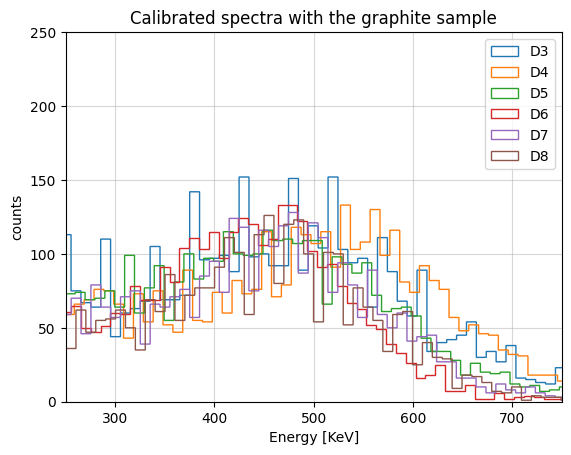

In [19]:
# plt.hist(gr_d1_def, bins=int(gr_d1.max()), histtype='step', label='D1')
# plt.hist(fe_d2_def, bins=int(fe_d2_def.max()/10), histtype='step', label='D2')
plt.hist(fe_d3_def, bins=int(fe_d3_def.max()/10), histtype='step', label='D3')
plt.hist(fe_d4_def, bins=int(fe_d4_def.max()/10), histtype='step', label='D4')
plt.hist(fe_d5_def, bins=int(fe_d5_def.max()/10), histtype='step', label='D5')
plt.hist(fe_d6_def, bins=int(fe_d6_def.max()/10), histtype='step', label='D6')
plt.hist(fe_d7_def, bins=int(fe_d7_def.max()/10), histtype='step', label='D7')
plt.hist(fe_d8_def, bins=int(fe_d8_def.max()/10), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the graphite sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 250)
plt.xlim(250, 750)
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('grafici/calibrated_graphite.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [22]:
# fit_gr_d1 = bbb.normal(gr_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(gr_d1_def.max()/6), n=k)
fit_fe_d2 = bbb.normal(fe_d2_def, xmin=250, xmax=600, x1=0, x2=1000, b=int(fe_d2_def.max()/10), n=k)
fit_fe_d3 = bbb.normal(fe_d3_def, xmin=350, xmax=620, x1=0, x2=1000, b=int(fe_d3_def.max()/10), n=k)
fit_fe_d4 = bbb.normal(fe_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(fe_d4_def.max()/10), n=k)
fit_fe_d5 = bbb.normal(fe_d5_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d5_def.max()/10), n=k)
fit_fe_d6 = bbb.normal(fe_d6_def, xmin=350, xmax=550, x1=0, x2=1000, b=int(fe_d6_def.max()/10), n=k)
fit_fe_d7 = bbb.normal(fe_d7_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d7_def.max()/10), n=k)
fit_fe_d8 = bbb.normal(fe_d8_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(fe_d8_def.max()/10), n=k)

#integrals dal det2 al det8
fe_int = np.array([2*fit_fe_d2[5][0], 2*fit_fe_d3[5][0], 2*fit_fe_d4[5][0], 2*fit_fe_d5[5][0], 2*fit_fe_d6[5][0], 2*fit_fe_d7[5][0], 2*fit_fe_d8[5][0]])
fe_int_err = np.array([2*fit_fe_d2[5][1], 2*fit_fe_d3[5][1], 2*fit_fe_d4[5][1], 2*fit_fe_d5[5][1], 2*fit_fe_d6[5][1], 2*fit_fe_d7[5][1], 2*fit_fe_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 263429.02238129266 ± 4699.246221714262
Media = 385.8648964521593 ± 1.7695545065993665
Sigma = 89.87868144683513 ± 1.9872935151883675
Chi-quadro = 146.88041323341506
Chi-quadro ridotto = 4.5900129135442205
Integrale dell'istogramma nel range [206.10753355848905, 565.6222593458295] = 25902 ± 160
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 37298.60206232531 ± 4375.703874218234
Media = 469.8265967482757 ± 11.330889731754771
Sigma = 128.74738539505378 ± 19.26820888020357
Chi-quadro = 131.40198405241793
Chi-quadro ridotto = 5.256079362096717
Integrale dell'istogramma nel range [212.3318259581681, 727.3213675383832] = 4003 ± 63
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 31430.160310594096 ± 2376.6392942564407
Media = 526.8196066461849 ± 6.3808041133253015
Sigma = 111.37869799721362 ± 10.886552627044166
Chi-quadro = 50.822933337850095
Ch